# **PCA**

- **Period 1:  January 1, 2020 through December 2021**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
file_paths = [
    "DGS1_20-21.csv",
    "DGS2_20-21.csv",
    "DGS5_20-21.csv",
    "DGS7_20-21.csv",
    "DGS10_20-21.csv",
    "DGS20_20-21.csv"
]

dfs = []

for file_path in file_paths:
    maturity = file_path.split("_")[0]

    df = pd.read_csv(file_path)

    df.columns = ["Date", maturity]

    df["Date"] = pd.to_datetime(df["Date"])

    dfs.append(df)

data = pd.concat(dfs, axis=1)

data = data.loc[:, ~data.columns.duplicated()]
data.set_index("Date", inplace=True)

data


,Date,DGS1,DGS2,DGS5,DGS7,DGS10,DGS20
0,2020-01-02,1.56,1.58,1.67,1.79,1.88,2.19
1,2020-01-03,1.55,1.53,1.59,1.71,1.80,2.11
2,2020-01-06,1.54,1.54,1.61,1.72,1.81,2.13
3,2020-01-07,1.53,1.54,1.62,1.74,1.83,2.16
4,2020-01-08,1.55,1.58,1.67,1.78,1.87,2.21
...,...,...,...,...,...,...,...
517,2021-12-27,0.33,0.76,1.26,1.41,1.48,1.92
518,2021-12-28,0.39,0.74,1.27,1.41,1.49,1.94
519,2021-12-29,0.38,0.75,1.29,1.47,1.55,2.00
520,2021-12-30,0.38,0.73,1.27,1.44,1.52,1.97


In [ ]:
data.replace('.', np.nan, inplace=True)
data = data.dropna()
print(data.isna().sum())

In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
pca = PCA()
pca.fit(data_std)
explained_variance_ratio = pca.explained_variance_ratio_

components = pca.components_

eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

data_eigval = pd.DataFrame({
    "Eigenvalues": eigenvalues,
    "Explained Propoetion": explained_variance_ratio
}, index=np.arange(1, len(eigenvalues) + 1))

styled_eigval = data_eigval.style.format({'Explained Propoetion': '{:.2%}'})

styled_eigval


,Eigenvalues,Explained Propoetion
1,4.419061,73.50%
2,1.478989,24.60%
3,0.105477,1.75%
4,0.005651,0.09%
5,0.002158,0.04%
6,0.000641,0.01%


In [ ]:
print("\nPrincipal Component Coefficients (Loadings):")
print(pd.DataFrame(components, columns=data.columns, index=[f"PC{i+1}" for i in range(len(components))]))



Principal Component Coefficients (Loadings):
         DGS1      DGS2      DGS5      DGS7     DGS10     DGS20
PC1  0.294249  0.361516  0.467371  0.463317  0.440129  0.394856
PC2  0.630479  0.532388  0.025993 -0.175182 -0.308107 -0.439050
PC3 -0.537347  0.162342  0.575507  0.252540 -0.204050 -0.498279
PC4 -0.390488  0.602364 -0.014115 -0.391781 -0.264606  0.510851
PC5  0.272808 -0.441092  0.570256 -0.200362 -0.508423  0.327387
PC6  0.016301  0.045929 -0.352547  0.705149 -0.584132  0.186791


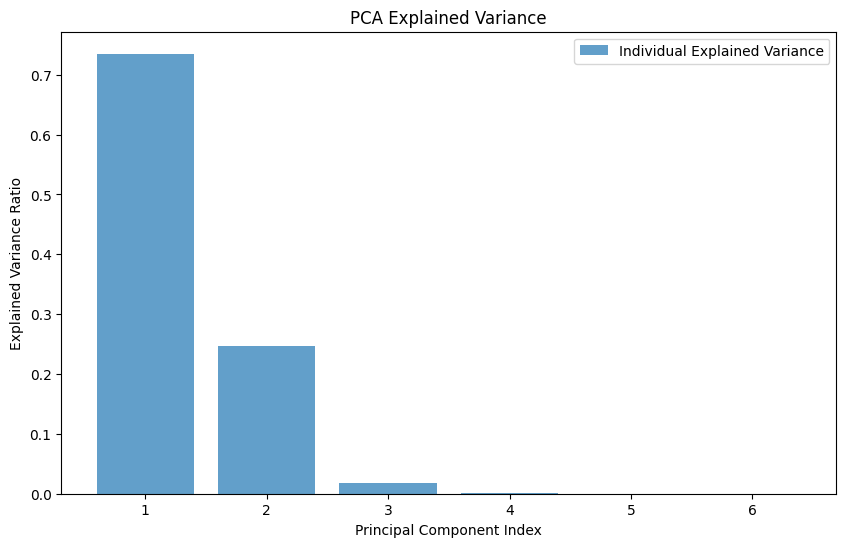

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.show()


- **Period 2:  January 1, 2022 through July 31, 2024**

In [ ]:
file_paths = [
    "DGS1_22-24.csv",
    "DGS2_22-24.csv",
    "DGS5_22-24.csv",
    "DGS7_22-24.csv",
    "DGS10_22-24.csv",
    "DGS20_22-24.csv"
]

dfs = []

for file_path in file_paths:
    maturity = file_path.split("_")[0]

    df = pd.read_csv(file_path)

    df.columns = ["Date", maturity]

    df["Date"] = pd.to_datetime(df["Date"])

    dfs.append(df)

data = pd.concat(dfs, axis=1)

data = data.loc[:, ~data.columns.duplicated()]
data.set_index("Date", inplace=True)

data

,DGS1,DGS2,DGS5,DGS7,DGS10,DGS20
Date,,,,,,
2022-01-03,0.40,0.78,1.37,1.55,1.63,2.05
2022-01-04,0.38,0.77,1.37,1.57,1.66,2.10
2022-01-05,0.41,0.83,1.43,1.62,1.71,2.12
2022-01-06,0.45,0.88,1.47,1.66,1.73,2.12
2022-01-07,0.43,0.87,1.50,1.69,1.76,2.15
...,...,...,...,...,...,...
2024-07-25,4.83,4.41,4.13,4.18,4.27,4.59
2024-07-26,4.79,4.36,4.06,4.1,4.2,4.53
2024-07-29,4.79,4.36,4.05,4.08,4.17,4.51


In [ ]:
data.replace('.', np.nan, inplace=True)
data = data.dropna()
print(data.isna().sum())

DGS1     0
DGS2     0
DGS5     0
DGS7     0
DGS10    0
DGS20    0
dtype: int64


In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
pca = PCA()
pca.fit(data_std)
explained_variance_ratio = pca.explained_variance_ratio_

components = pca.components_

eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

data_eigval = pd.DataFrame({
    "Eigenvalues": eigenvalues,
    "Explained Propoetion": explained_variance_ratio
}, index=np.arange(1, len(eigenvalues) + 1))

styled_eigval = data_eigval.style.format({'Explained Propoetion': '{:.2%}'})

styled_eigval

,Eigenvalues,Explained Propoetion
1,5.856290,97.45%
2,0.128478,2.14%
3,0.021057,0.35%
4,0.002383,0.04%
5,0.000903,0.02%
6,0.000206,0.00%


In [ ]:
print("\nPrincipal Component Coefficients (Loadings):")
print(pd.DataFrame(components, columns=data.columns, index=[f"PC{i+1}" for i in range(len(components))]))



Principal Component Coefficients (Loadings):
         DGS1      DGS2      DGS5      DGS7     DGS10     DGS20
PC1  0.399163  0.408433  0.411874  0.411534  0.409953  0.408400
PC2  0.708815  0.403320 -0.123426 -0.254605 -0.349117 -0.364656
PC3  0.418717 -0.384012 -0.524297 -0.228574  0.165076  0.568179
PC4  0.229014 -0.316011 -0.157828  0.236988  0.624194 -0.614002
PC5 -0.331788  0.645332 -0.508366 -0.220514  0.407900  0.004344
PC6 -0.019906  0.082056 -0.506846  0.780244 -0.356098  0.019772


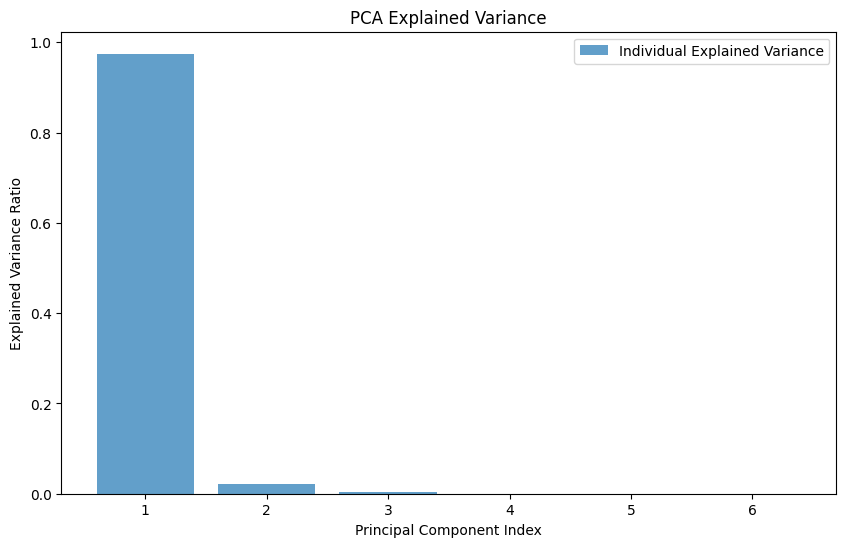

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.show()



# **Differences between two periods & Reasons**

- **Differences**
1. During the first period from 2020/01/01 to 2021/12/31, it is shown that the 1st principal component explains about 73.50% of its variance and the 2nd  principal component explains about 24.60% of its variance. After that, the variance explained by the components decreases significantly, almost approaching zero. During the second period from 2022/01/01 to 2024/07/31, it is shown that the 1st principal component explains about 97.45% of its variance and the variance explained by the subsequent components decreases significantly, almost approaching zero. This means that the treasury yield in the first period has a high variance on multiple principal components and is relatively scattered. However, in the second period, most of the variance is concentrated on the first principal component, and the variability of the treasury yield is mainly dominated by one component, with minimal contributions from other components.

2. For PC1 and PC2 to explain most of the variance during period 1, their coefficients of them vary greatly across different periods, ranging from 0.29 (1-year) to 0.44 (20-year) and 0.63 (1-year) to -0.44 (20-year). For PC1 which explains most of the variance during period 2, the coefficient of PC1 is relatively more uniform across different periods, ranging from 0.39 (1 year)to 0.41 (5 years). Generally, the first period shows a more significant difference between short-term and long-term treasury yield. In the second period, the impact of different spans of treasury yield returns on the results is relatively consistent, and the weight changes are relatively small.





- **Reasons**

1. This difference in the variety of leading components could be caused by the fact that during the first phase (2020-2021), multiple factors contributed to the movement of treasury yields, including pandemic-related policies, market sentiment, and economic recovery expectations. These diverse drivers led to multiple principal components contributing significantly to the yield curve variance. However, during the second period (2022-2024), the Federal Reserve's tightening policies dominated yield changes during this phase, reducing the relative influence of other factors. It is also shown in the figure below that treasury yield is fluctuating and hard to explain from 2020-01 to 2021-12 while it has an increasing trend from 2022-01 to 2024-07 which can be directly caused by monetary tightening policy.

2.   The difference in weights of different treasury yields in PCA could be caused by the fact that during period 1, short-term yields were suppressed by the Federal Reserve's near-zero rate policies, while long-term yields reflected economic recovery expectations. This led to less coherence between different maturities. However, during period 2, as rate hikes affected both short- and long-term yields, the entire yield curve moved more cohesively. It is also shown in the figure below that during the first period, especially 2020-03 to 2021-12, there are relatively large gaps between treasury yields of different time spans while during the second period, especially for 1-year and 5-year treasury yields, there are little discrepancy.



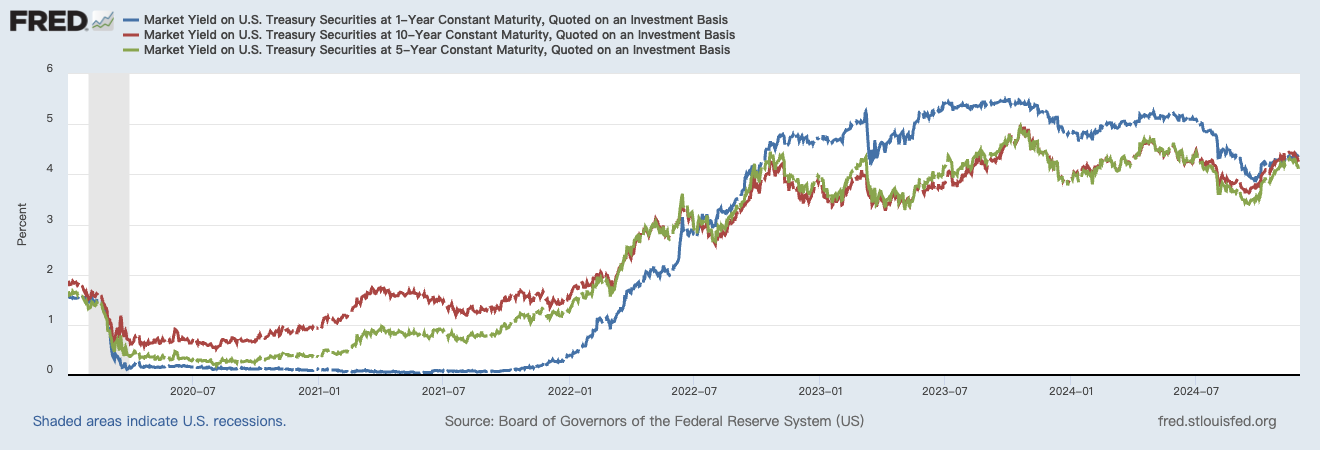

# **PCA Analysis**

- **August 1, 2024, until today**

In [ ]:
file_paths = [
    "DGS1_24-now.csv",
    "DGS2_24-now.csv",
    "DGS5_24-now.csv",
    "DGS7_24-now.csv",
    "DGS10_24-now.csv",
    "DGS20_24-now.csv"
]

dfs = []

for file_path in file_paths:
    maturity = file_path.split("_")[0]

    df = pd.read_csv(file_path)

    df.columns = ["Date", maturity]

    df["Date"] = pd.to_datetime(df["Date"])

    dfs.append(df)

data = pd.concat(dfs, axis=1)

data = data.loc[:, ~data.columns.duplicated()]
data.set_index("Date", inplace=True)

data

,DGS1,DGS2,DGS5,DGS7,DGS10,DGS20
Date,,,,,,
2024-08-01,4.62,4.16,3.84,3.89,3.99,4.35
2024-08-02,4.33,3.88,3.62,3.68,3.8,4.19
2024-08-05,4.34,3.89,3.62,3.66,3.78,4.16
2024-08-06,4.46,3.99,3.73,3.79,3.9,4.28
2024-08-07,4.45,4.0,3.79,3.85,3.96,4.35
...,...,...,...,...,...,...
2024-11-25,4.37,4.21,4.17,4.21,4.27,4.53
2024-11-26,4.37,4.21,4.17,4.24,4.3,4.56
2024-11-27,4.34,4.19,4.11,4.17,4.25,4.52


In [ ]:
data.replace('.', np.nan, inplace=True)
data = data.dropna()
print(data.isna().sum())

DGS1     0
DGS2     0
DGS5     0
DGS7     0
DGS10    0
DGS20    0
dtype: int64


In [ ]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
pca = PCA()
pca.fit(data_std)
explained_variance_ratio = pca.explained_variance_ratio_

components = pca.components_

eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

data_eigval = pd.DataFrame({
    "Eigenvalues": eigenvalues,
    "Explained Propoetion": explained_variance_ratio
}, index=np.arange(1, len(eigenvalues) + 1))

styled_eigval = data_eigval.style.format({'Explained Propoetion': '{:.2%}'})

styled_eigval

,Eigenvalues,Explained Propoetion
1,5.246137,86.38%
2,0.801300,13.19%
3,0.021000,0.35%
4,0.003646,0.06%
5,0.000646,0.01%
6,0.000440,0.01%


In [ ]:
print("\nPrincipal Component Coefficients (Loadings):")
print(pd.DataFrame(components, columns=data.columns, index=[f"PC{i+1}" for i in range(len(components))]))



Principal Component Coefficients (Loadings):
         DGS1      DGS2      DGS5      DGS7     DGS10     DGS20
PC1  0.270072  0.427522  0.435568  0.432000  0.429461  0.428376
PC2  0.884941  0.235797 -0.134878 -0.199372 -0.233380 -0.221071
PC3  0.295734 -0.598279 -0.290582 -0.092246  0.132354  0.666437
PC4 -0.231909  0.578212 -0.197696 -0.490422 -0.252721  0.518096
PC5  0.041886 -0.248220  0.734747 -0.111699 -0.592842  0.181222
PC6 -0.030761  0.088000 -0.358768  0.715630 -0.572931  0.149058


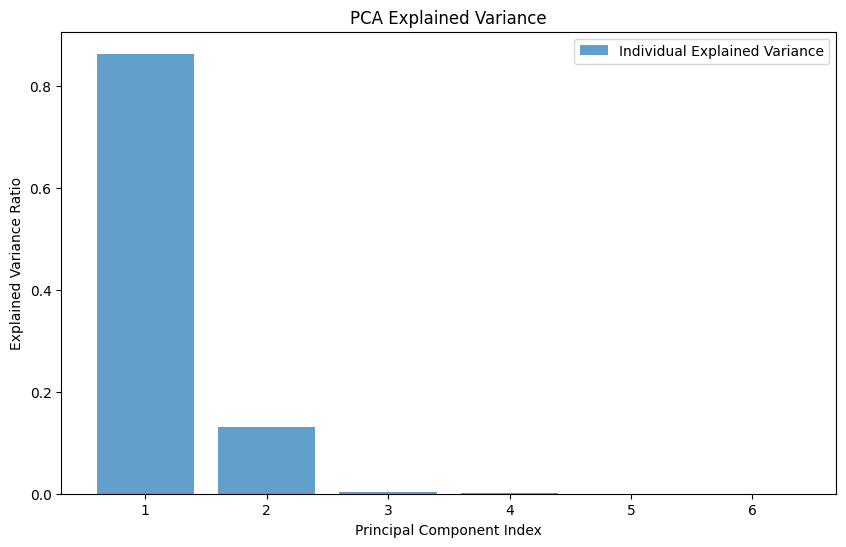

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.show()

- **Analysis:**

1.   During the period from 2024/08/01 to 2024/11/29, it is shown that the 1st principal component explains about 86.38% of its variance and the 2nd  principal component explains about 13.19% of its variance. After that, the variance explained by the components decreases significantly, almost approaching zero.

2.   For PC1 and PC2 to explain most of the variance during this period, their coefficients of them vary across different periods, ranging from 0.27 (1-year) to 0.44 (5-year) and 0.88 (1-year) to -0.23 (10-year).

3.   The PCA result for the period from 2024/08/01 till now is kind of an intermediate structure between period 1 (2020/01/01 - 2021/12/31) and period 2 (2022/01/01 - 2024/07/31). This might be caused by recovering from COVID-19, and the Fed's pivot might have reduced uncertainty. PC1 dominance reflects alignment in short- and long-term yield movements. PC2's contribution suggests some divergence, likely driven by uncertainty around inflation and the unemployment rate.

4.   It is notable that Fed cut rate twice during this period. Fed cut rate 50-basis points on Sep 18 and 25-basis points on Nov 7. However, as shown in the figure from FRED, treasury yield increased by nearly 0.50%. This increase was likely driven at least in part by a more bullish economic outlook in US.




